# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### The task is to define what is the best investment in the city related to sale x rent. So we want to define what kind of property and what district of the city has the best return rate. The return rate is defined as rent value / sale value normalized by size. So for each Brazilian Real invested in sale how much will be the return in rent.


# Downloading csv file

In [2]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')

In [3]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


# Data Wrangling

### Verifying missing values

In [4]:
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

### Verifying types of variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

### Verifying dummie values in descrete, categorical and boolean variables

In [6]:
df.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df['Rooms'].unique()

array([ 2,  1,  3,  4,  5, 10,  6,  7], dtype=int64)

In [8]:
df['Toilets'].unique()

array([2, 3, 4, 1, 5, 6, 7, 8], dtype=int64)

In [9]:
df['Suites'].unique()

array([1, 3, 2, 4, 0, 5, 6], dtype=int64)

In [10]:
df['Parking'].unique()

array([1, 2, 3, 4, 5, 6, 8, 9, 0, 7], dtype=int64)

In [11]:
df['Elevator'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Furnished'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Swimming Pool'].unique()

array([0, 1], dtype=int64)

In [14]:
df['New'].unique()

array([0, 1], dtype=int64)

In [15]:
df['Property Type'].unique()

array(['apartment'], dtype=object)

In [16]:
df['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

### Spliting districts and cities

In [17]:
df[['District', 'City']] = df['District'].str.split('/', expand=True)

In [18]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,City
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486,São Paulo
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718,São Paulo
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665,São Paulo
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014,São Paulo
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436,São Paulo


In [19]:
df['City'].unique()

array(['São Paulo'], dtype=object)

There is just one single city and one single type of property, so this varibles can be removed

In [20]:
df = df.drop(['City', 'Property Type'], axis=1)

### Verifying the coordinates

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

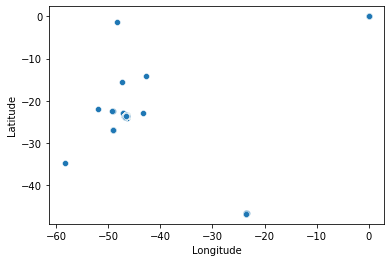

In [21]:
sns.scatterplot(data=df, x='Longitude', y='Latitude')

The city of Sao Paulo is located close to the -23° Latitude / -46° Longitude, so there are several inconsistent values.

In [22]:
df[df['Longitude'] > -10]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
2117,1700,320,43,2,1,0,1,1,0,0,0,Barra Funda,rent,0.0,0.0
2133,1400,120,70,2,1,0,0,0,0,0,0,Barra Funda,rent,0.0,0.0
2138,1600,810,67,2,2,1,1,0,0,1,0,Barra Funda,rent,0.0,0.0
2148,2500,415,63,2,1,0,1,0,0,1,0,Barra Funda,rent,0.0,0.0
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda,rent,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1200000,1200,100,2,1,0,1,0,0,1,0,Itaim Bibi,sale,0.0,0.0
13615,725000,625,86,3,2,1,3,0,0,1,0,Jabaquara,sale,0.0,0.0
13622,290000,470,40,1,1,0,1,0,0,0,0,Jabaquara,sale,0.0,0.0
13623,230000,528,52,2,1,0,0,0,0,0,0,Jabaquara,sale,0.0,0.0


data without coordinates was set with zero.

In [23]:
df[df['Latitude'] < -30]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
1113,1300,637,50,2,2,1,1,1,0,0,0,Jabaquara,rent,-46.648904,-23.652027
1211,2200,500,30,1,2,1,1,1,0,1,0,Moema,rent,-46.655399,-23.607013
1583,2600,974,76,2,2,1,2,1,1,1,0,Alto de Pinheiros,rent,-46.715115,-23.540783
1792,1400,580,60,3,2,1,1,1,0,1,0,Jaguaré,rent,-46.749039,-23.545329
1937,4200,800,97,2,3,1,2,1,1,1,0,Perdizes,rent,-46.678478,-23.534683
1962,4000,360,35,1,2,1,1,1,1,1,0,Pinheiros,rent,-46.700223,-23.568745
3667,3000,585,85,2,2,1,1,0,0,1,0,Jabaquara,rent,-34.625124,-58.364352
5545,380000,528,48,2,2,1,2,1,0,0,0,Consolação,sale,-46.648555,-23.548484
6888,490000,1000,89,2,2,1,1,0,0,0,0,Cambuci,sale,-46.626667,-23.577821
9773,1100,200,45,2,2,1,1,0,1,0,0,Vila Curuçá,rent,-46.428927,-23.517640


here we see values with inverted position (Latitude x Longitude)

In [24]:
df[(df['Longitude'] == 0) | (df['Latitude'] == 0)]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
2117,1700,320,43,2,1,0,1,1,0,0,0,Barra Funda,rent,0.0,0.0
2133,1400,120,70,2,1,0,0,0,0,0,0,Barra Funda,rent,0.0,0.0
2138,1600,810,67,2,2,1,1,0,0,1,0,Barra Funda,rent,0.0,0.0
2148,2500,415,63,2,1,0,1,0,0,1,0,Barra Funda,rent,0.0,0.0
2149,2250,470,51,2,1,0,1,0,0,1,0,Barra Funda,rent,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1200000,1200,100,2,1,0,1,0,0,1,0,Itaim Bibi,sale,0.0,0.0
13615,725000,625,86,3,2,1,3,0,0,1,0,Jabaquara,sale,0.0,0.0
13622,290000,470,40,1,1,0,1,0,0,0,0,Jabaquara,sale,0.0,0.0
13623,230000,528,52,2,1,0,0,0,0,0,0,Jabaquara,sale,0.0,0.0


There is a total of 881 missing values of coordinates and several other with wrong values. But as the data is located by districts we consider that is enough to clustering these data. So we can drop the coordenates in order to avoid mistakes in the future predictive model, but assuming that districts is enough to categorize them. 

In [25]:
df = df.drop(['Latitude', 'Longitude'], axis=1)

In [26]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent


### Evaluating numercial variables by Negotiation Type

In [27]:
df[df['Negotiation Type']=='rent'].describe()[['Price', 'Condo', 'Size']]

,Price,Condo,Size
count,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165
std,3522.830284,835.621937,63.976416
min,480.000000,0.000000,30.000000
25%,1350.000000,395.750000,52.000000
50%,2000.000000,595.000000,67.000000
75%,3300.000000,990.000000,100.000000
max,50000.000000,9500.000000,880.000000


In [28]:
df[df['Negotiation Type']=='sale'].describe()[['Price', 'Condo', 'Size']]

,Price,Condo,Size
count,6.412000e+03,6412.000000,6412.000000
mean,6.086241e+05,537.349813,78.611042
std,7.404515e+05,624.632473,50.872359
min,4.200000e+04,0.000000,30.000000
25%,2.500000e+05,150.000000,50.000000
50%,3.800000e+05,400.000000,62.000000
75%,6.790000e+05,700.000000,87.000000
max,1.000000e+07,8920.000000,620.000000


### Creating two new data frames based on negotiation type

In [29]:
dfr = df[df['Negotiation Type'] == 'rent']
dfs = df[df['Negotiation Type'] == 'sale']

<AxesSubplot:xlabel='Price', ylabel='Count'>

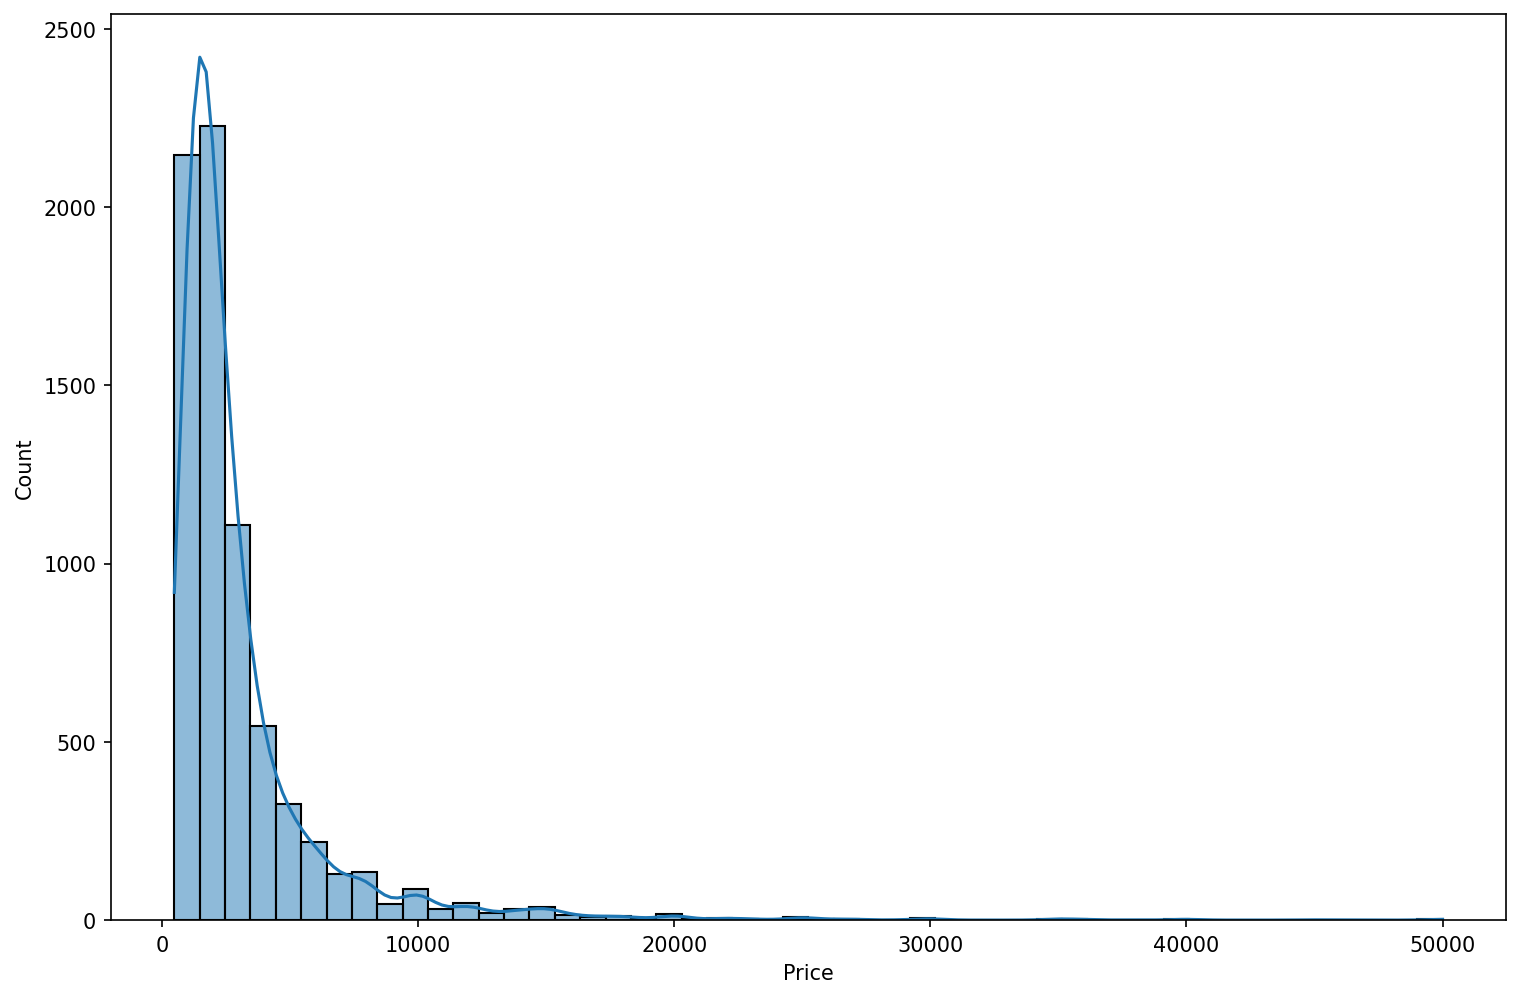

In [30]:
plt.figure(figsize=(12,8), dpi=150)
sns.histplot(data=dfr, x='Price', bins=50, kde=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

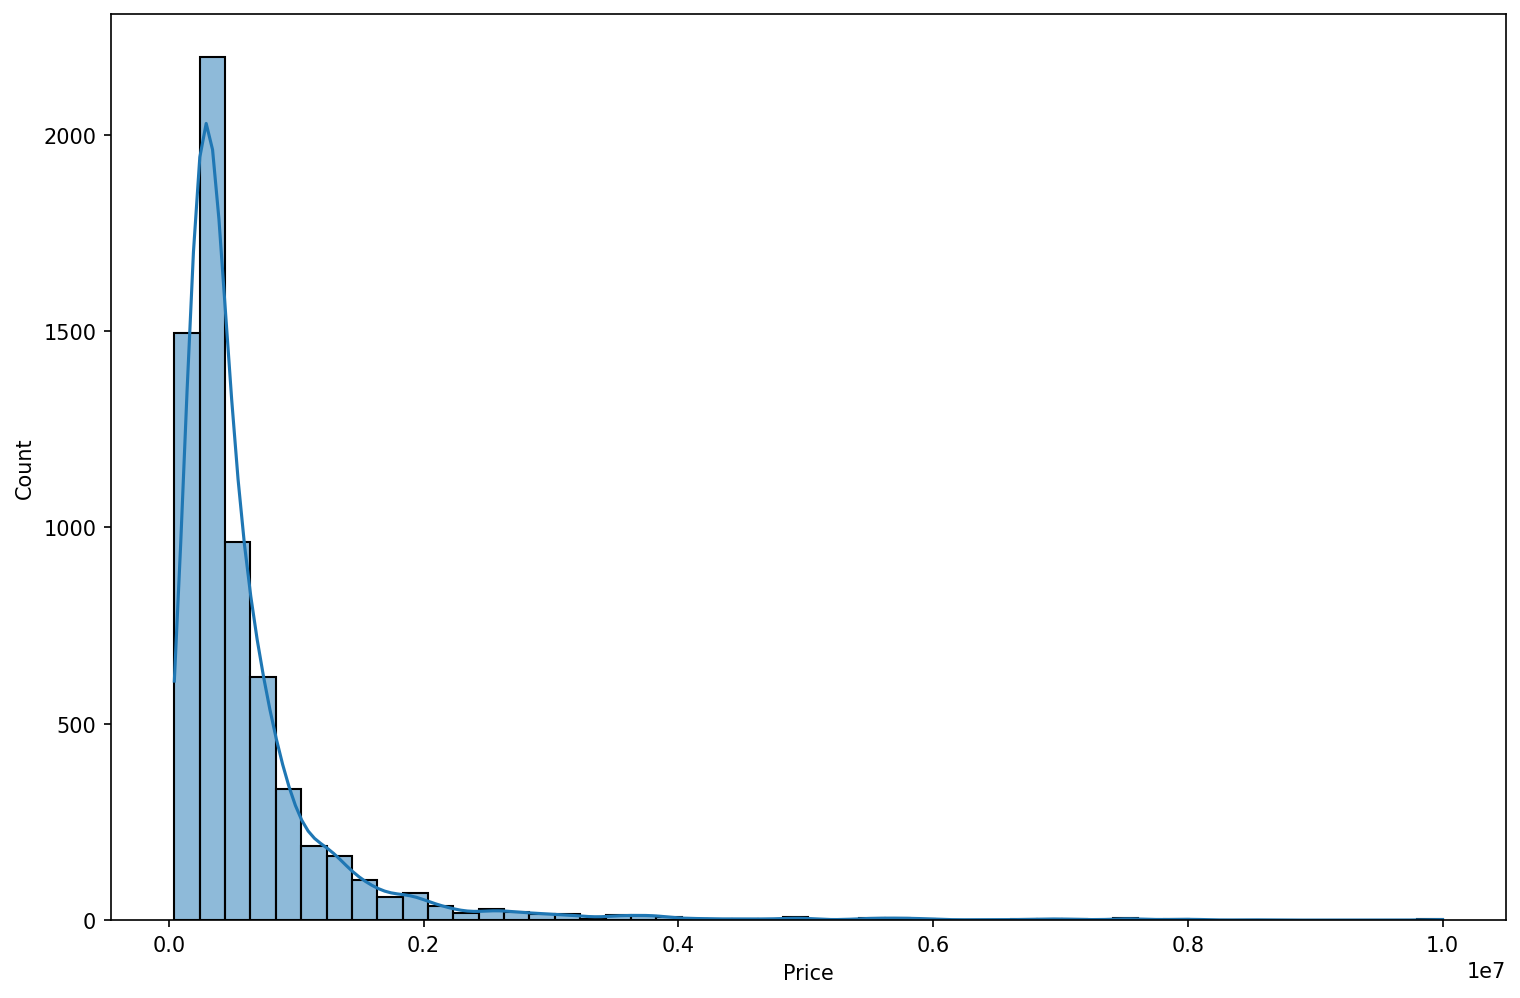

In [31]:
plt.figure(figsize=(12,8), dpi=150)
sns.histplot(data=dfs, x='Price', bins=50, kde=True)

### Creating a new varible - Price per squared meter for rent and sale

In [32]:
dfr['Price m2'] = dfr['Price'] / dfr['Size']
dfs['Price m2'] = dfs['Price'] / dfs['Size']

<ipython-input-32-734d7f4884dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Price m2'] = dfr['Price'] / dfr['Size']
<ipython-input-32-734d7f4884dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Price m2'] = dfs['Price'] / dfs['Size']


In [33]:
dfr.sort_values('Price m2', ascending=False)[0:10]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Price m2
1037,15000,100,58,2,2,1,1,0,0,0,0,Ipiranga,rent,258.620690
10622,7000,2019,35,1,1,0,1,0,0,0,0,Itaim Bibi,rent,200.000000
3648,8200,1842,42,1,1,0,2,0,0,1,0,Itaim Bibi,rent,195.238095
3647,8200,1842,42,1,1,0,2,0,0,1,0,Itaim Bibi,rent,195.238095
9660,6500,500,35,1,2,1,1,0,1,0,0,Iguatemi,rent,185.714286
11162,8000,1824,47,1,2,1,2,1,1,1,0,Vila Olimpia,rent,170.212766
1979,5000,0,30,1,2,1,1,0,1,1,0,Pinheiros,rent,166.666667
4690,5000,0,30,1,1,0,0,0,1,1,0,Pinheiros,rent,166.666667
3598,15000,2175,98,2,3,2,2,0,0,1,0,Itaim Bibi,rent,153.061224
3615,5500,2000,36,1,2,1,1,0,1,1,0,Itaim Bibi,rent,152.777778


In [34]:
dfs.sort_values('Price m2', ascending=False)[0:10]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Price m2
11578,3050003,0,66,3,2,1,1,1,0,1,1,Vila Prudente,sale,46212.166667
5025,915000,756,30,3,1,0,2,0,1,1,0,Mooca,sale,30500.000000
7152,8000000,0,269,4,5,4,4,1,0,1,0,Itaim Bibi,sale,29739.776952
6282,10000000,0,343,4,7,4,5,0,0,0,0,Iguatemi,sale,29154.518950
6287,9979947,0,343,4,6,4,5,1,0,1,0,Iguatemi,sale,29096.055394
5008,8039200,0,278,4,7,4,4,1,1,1,0,Vila Olimpia,sale,28917.985612
5006,8000000,0,278,4,5,3,5,1,0,1,0,Vila Olimpia,sale,28776.978417
6286,7765616,0,279,4,6,4,4,1,0,1,0,Iguatemi,sale,27833.749104
6290,7500000,0,275,4,5,4,4,1,0,1,0,Iguatemi,sale,27272.727273
6279,7080000,0,275,4,5,4,5,0,0,1,0,Iguatemi,sale,25745.454545


### Describing the Price m2 variable

In [35]:
dfr['Price m2'].describe()

count    7228.000000
mean       33.659012
std        19.585932
min         5.000000
25%        21.464180
50%        28.125000
75%        38.382508
max       258.620690
Name: Price m2, dtype: float64

In [36]:
dfs['Price m2'].describe()

count     6412.000000
mean      6891.640879
std       3182.692495
min        755.555556
25%       4791.666667
50%       6148.094816
75%       8113.207547
max      46212.166667
Name: Price m2, dtype: float64

<AxesSubplot:>

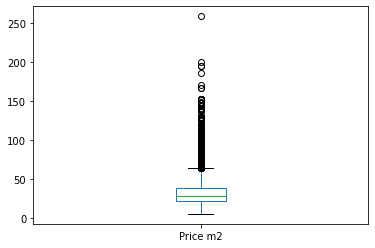

In [37]:
dfr['Price m2'].plot.box()

<AxesSubplot:>

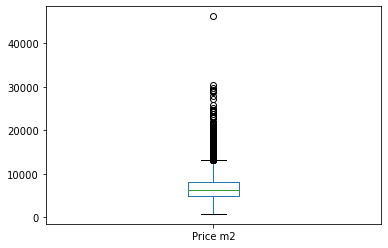

In [38]:
dfs['Price m2'].plot.box()

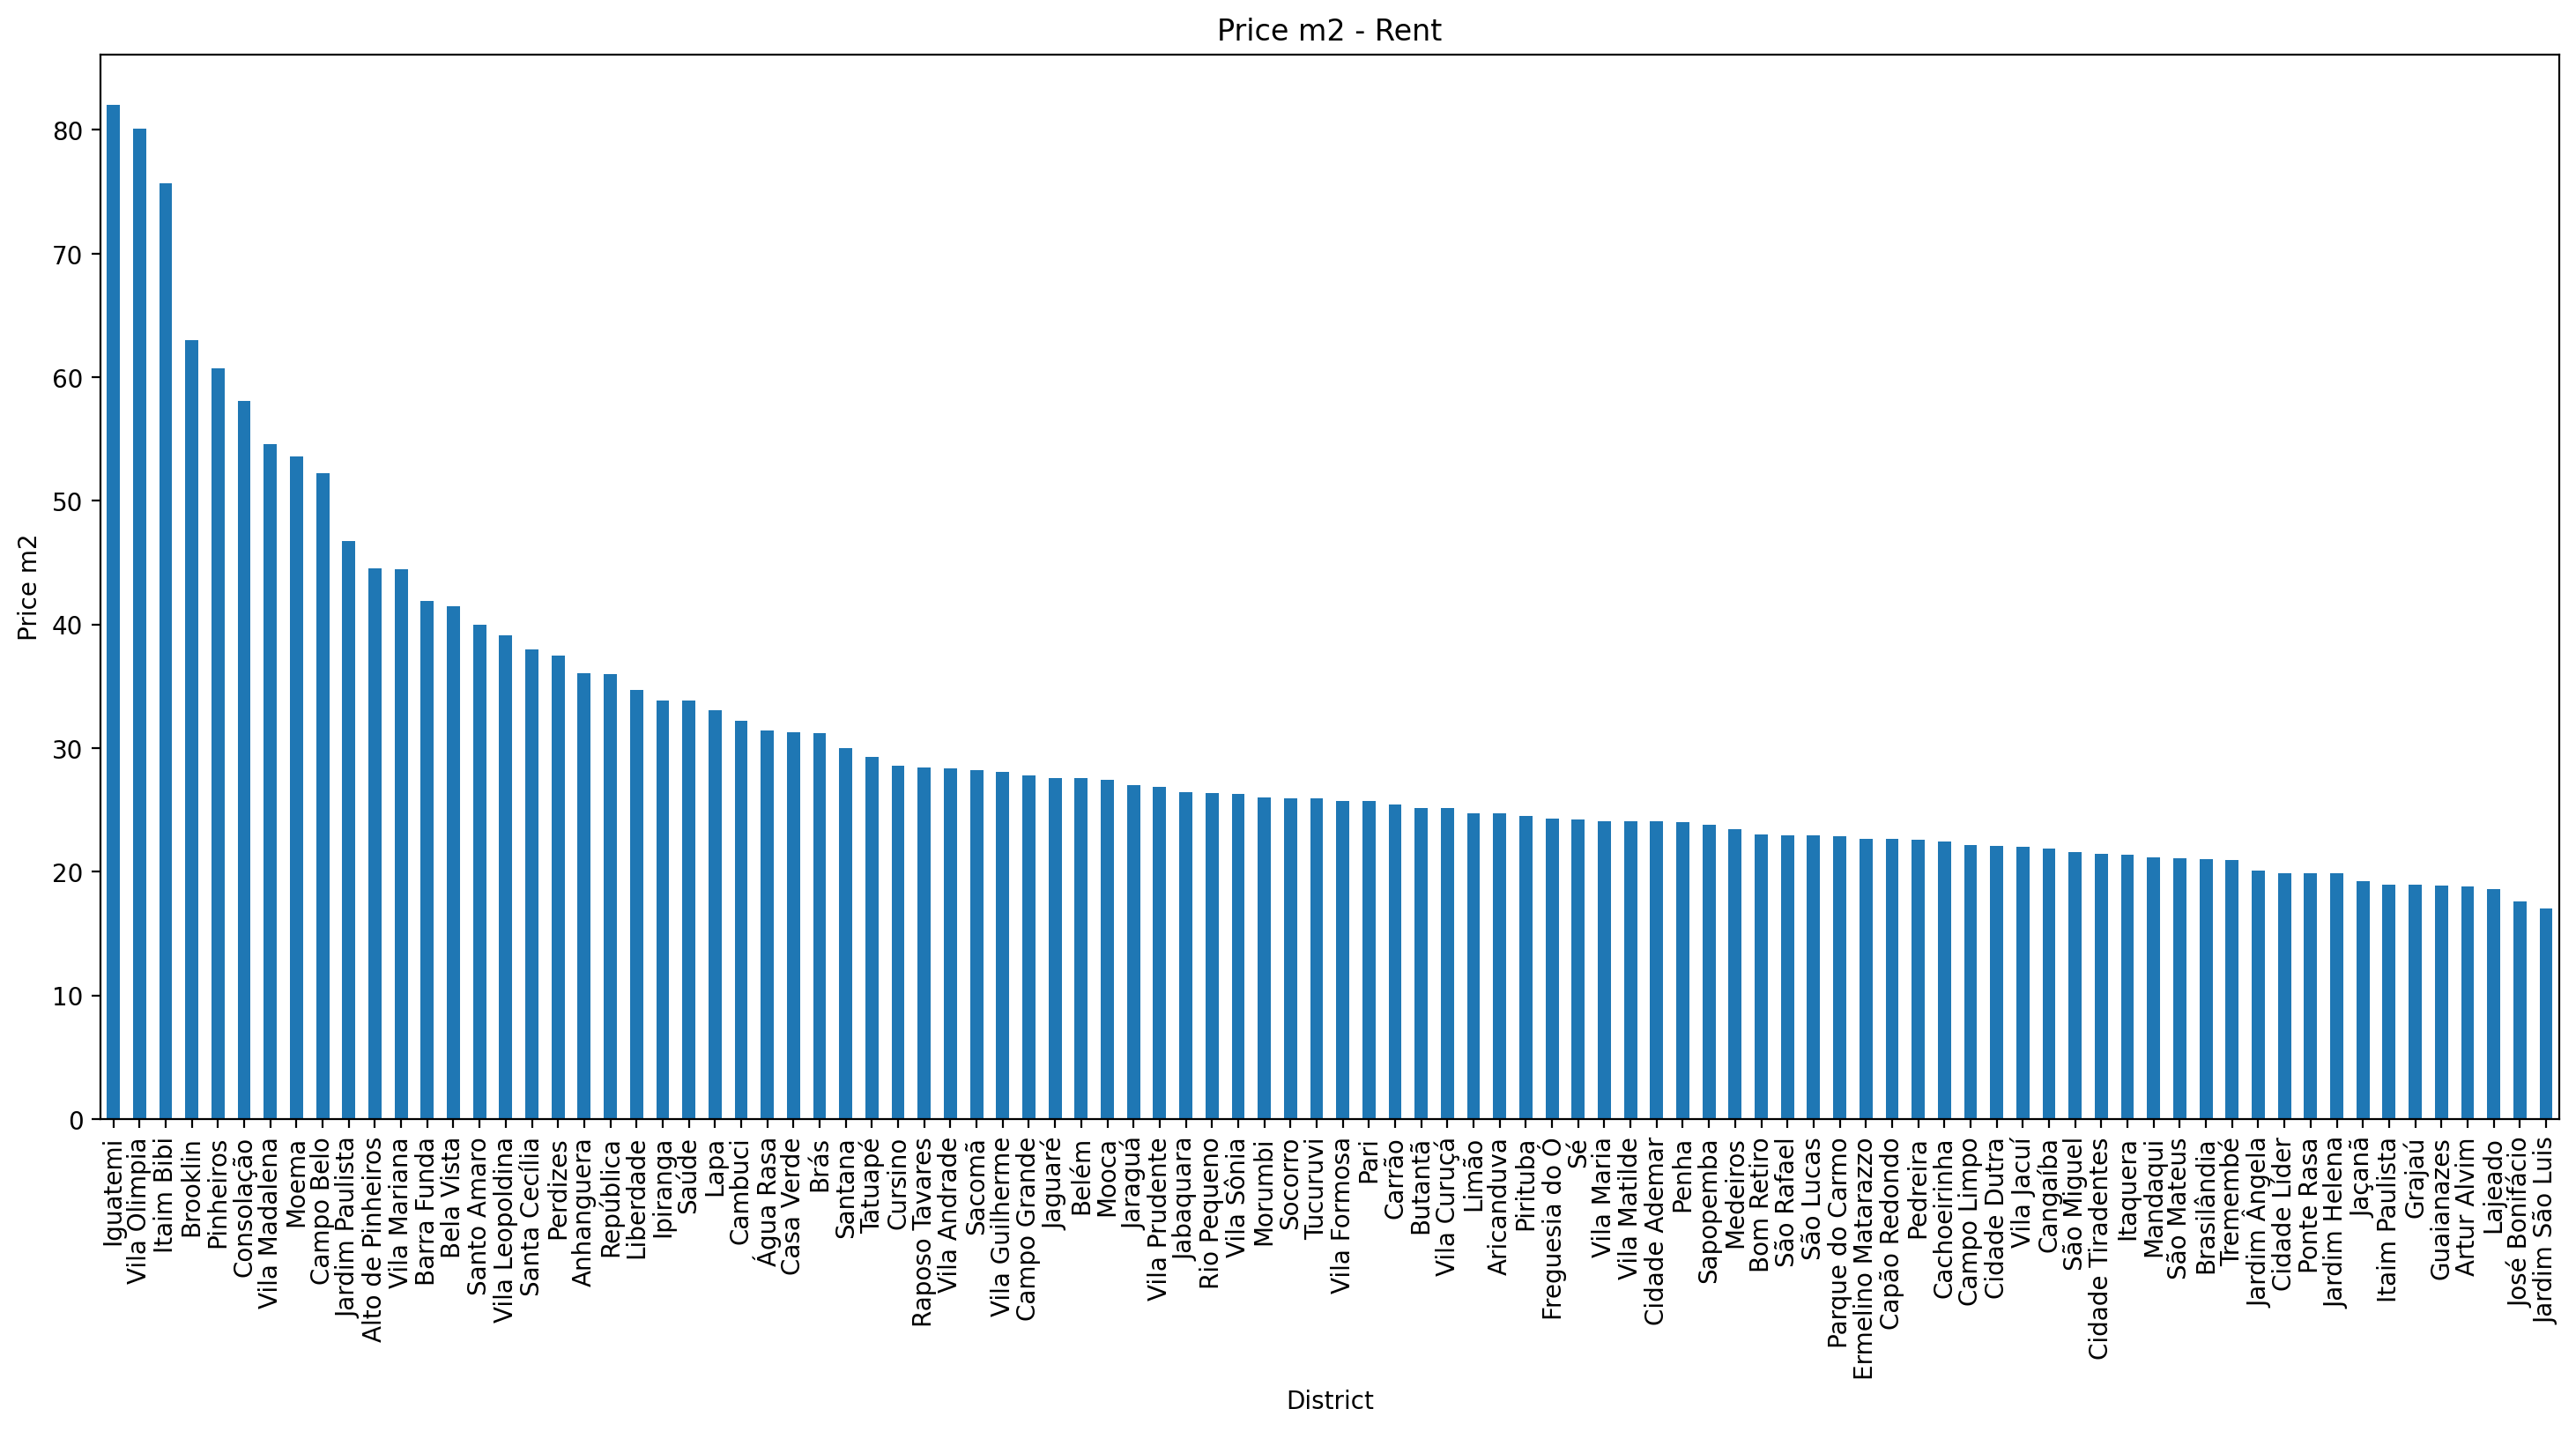

In [39]:
plt.figure(figsize=(18,8),dpi=200)
plt.title("Price m2 - Rent")
plt.ylabel("Price m2")
dfr.groupby('District')['Price m2'].mean().sort_values(ascending=False).plot.bar();

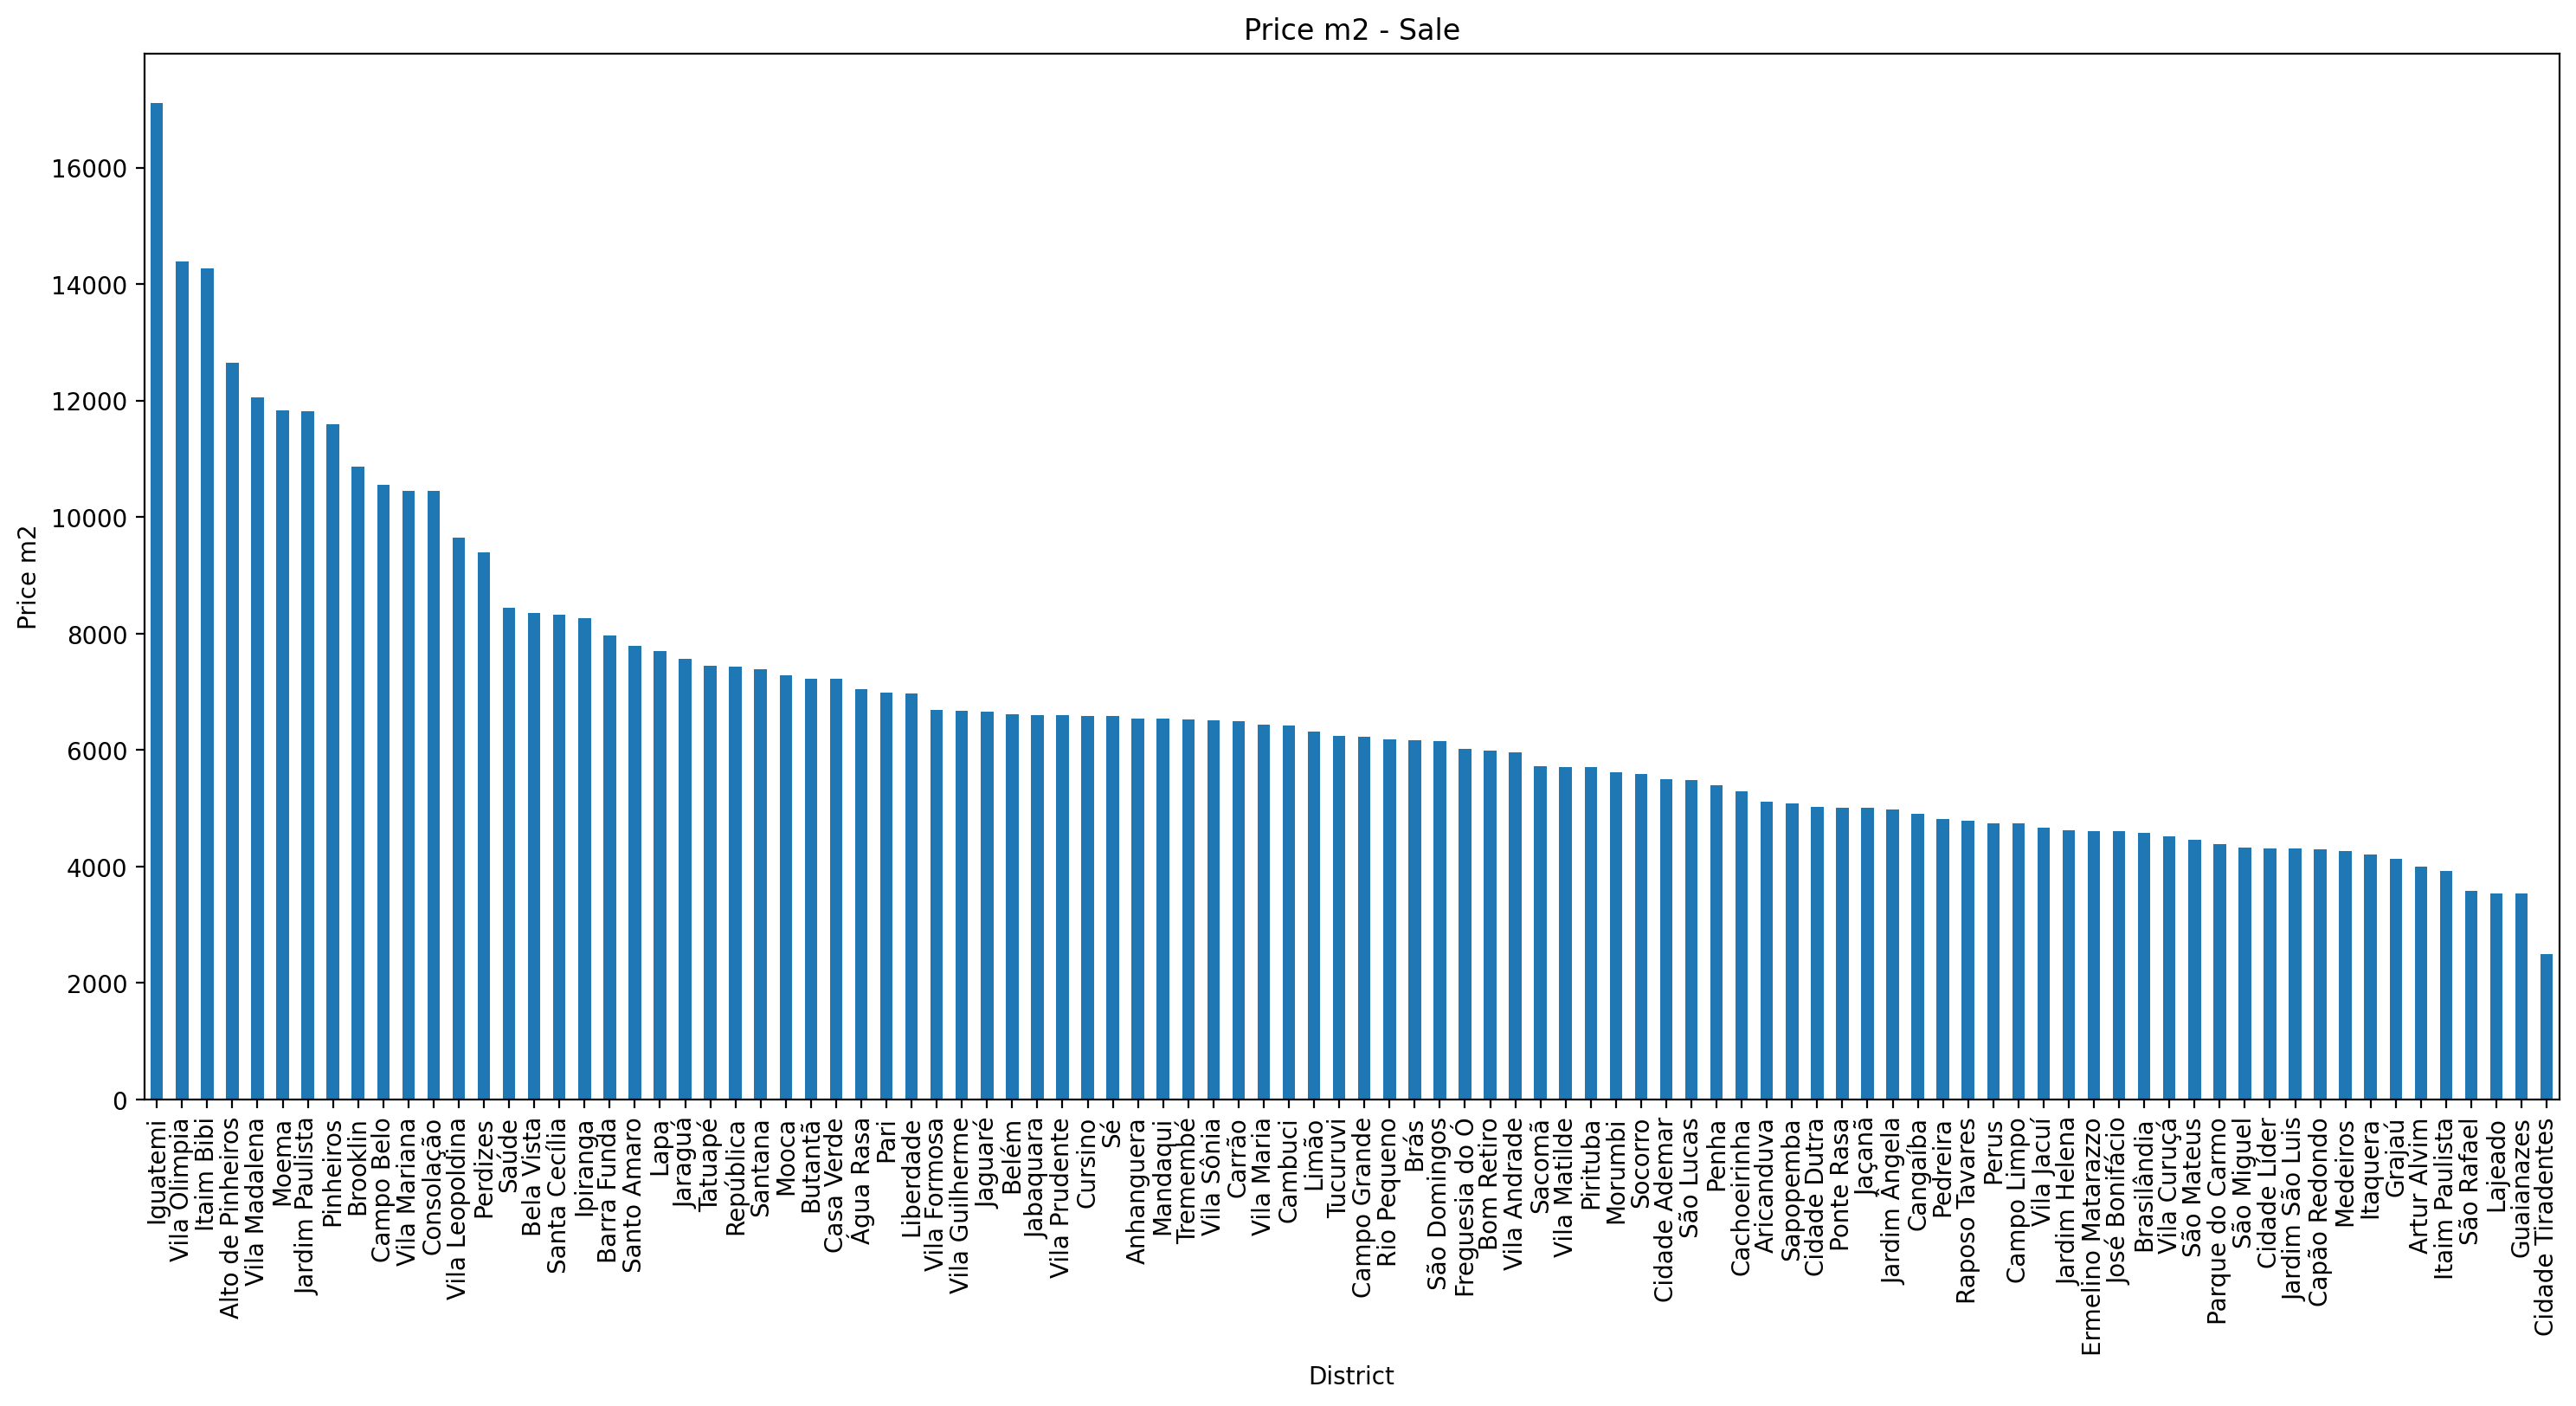

In [40]:
plt.figure(figsize=(18,8),dpi=200)
plt.title("Price m2 - Sale")
plt.ylabel("Price m2")
dfs.groupby('District')['Price m2'].mean().sort_values(ascending=False).plot.bar();

We can see there are several outliers but, removing them based on entire sample will introduce a mistake because tradicionaly there are some districts with high values, so in order to remove the outlier is necessary to consider two things: the value per squared meter and the values grouped by districts. 

In [41]:
lista_district = dfr['District'].unique()

In [42]:
lista_district

array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
       'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
       'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

In [43]:
for district in lista_district:
    med = dfr[dfr['District'] == district]['Price m2'].mean()
    q1 = dfr[dfr['District'] == district]['Price m2'].quantile(.25)
    q3 = dfr[dfr['District'] == district]['Price m2'].quantile(.75)
    outlier1 = ((q3 - q1) * 3) + med
    outlier2 = med - ((q3 - q1) * 3)
    dfr = dfr.drop(dfr[(dfr['District'] == district) & (dfr['Price m2'] > outlier1)].index)
    dfr = dfr.drop(dfr[(dfr['District'] == district) & (dfr['Price m2'] < outlier2)].index)

<AxesSubplot:>

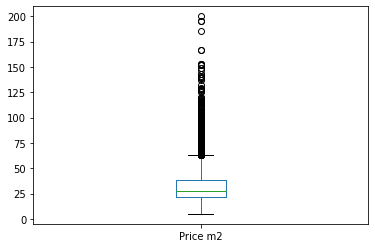

In [44]:
dfr['Price m2'].plot.box()

In [45]:
for district in lista_district:
    med = dfs[dfs['District'] == district]['Price m2'].mean()
    q1 = dfs[dfs['District'] == district]['Price m2'].quantile(.25)
    q3 = dfs[dfs['District'] == district]['Price m2'].quantile(.75)
    outlier1 = ((q3 - q1) * 3) + med
    outlier2 = med - ((q3 - q1) * 3)
    dfs = dfs.drop(dfs[(dfs['District'] == district) & (dfs['Price m2'] > outlier1)].index)
    dfs = dfs.drop(dfs[(dfs['District'] == district) & (dfs['Price m2'] < outlier2)].index)

<AxesSubplot:>

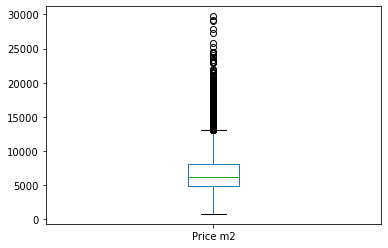

In [46]:
dfs['Price m2'].plot.box()

Instead of considering 1.5 times the interquartile difference, we considered 3 times in order to remove just the extreme values.

# Defining the return rate based on districts

In [47]:
rrd = (dfr.groupby('District')['Price m2'].mean() / dfs.groupby('District')['Price m2'].mean())*100

In [48]:
rrd.sort_values(ascending=False)[:50]

District
Cidade Tiradentes     0.662921
Raposo Tavares        0.594894
Brooklin              0.580490
Vila Olimpia          0.559180
Guaianazes            0.558139
Vila Curuçá           0.556847
Consolação            0.555936
Anhanguera            0.551185
Medeiros              0.549672
Itaim Bibi            0.530628
Barra Funda           0.529937
Capão Redondo         0.527225
Pinheiros             0.523784
Parque do Carmo       0.521664
Itaim Paulista        0.516874
Lajeado               0.515939
Sacomã                0.511418
Itaquera              0.509274
Cambuci               0.507920
Brás                  0.507152
Bela Vista            0.499821
São Miguel            0.499540
Santo Amaro           0.496498
Liberdade             0.496311
Campo Belo            0.494977
São Rafael            0.492277
Ermelino Matarazzo    0.491421
Aricanduva            0.483552
Iguatemi              0.479447
Campo Limpo           0.475677
São Mateus            0.472867
República             0.472105

Some periferic districts have a good return rate because the price m2 for sale is so small.

In [49]:
rrd.sort_values(ascending=False)[50:].dropna()

District
Vila Prudente        0.435106
Brasilândia          0.434301
Casa Verde           0.433526
Cursino              0.433361
Pirituba             0.429857
Lapa                 0.428967
Rio Pequeno          0.426413
Vila Mariana         0.425406
Vila Matilde         0.421757
Cachoeirinha         0.420313
São Lucas            0.418068
Belém                0.416399
Vila Guilherme       0.414789
Jabaquara            0.413193
Jardim Helena        0.412337
Jaguaré              0.408936
Tucuruvi             0.408618
Santana              0.405621
Vila Sônia           0.404141
Freguesia do Ó       0.403084
Vila Leopoldina      0.399113
Saúde                0.397243
Ponte Rasa           0.395925
Jardim São Luis      0.395715
José Bonifácio       0.395052
Perdizes             0.393247
Carrão               0.391625
Ipiranga             0.390437
Jardim Paulista      0.390024
Tatuapé              0.388959
Limão                0.388193
Jardim Ângela        0.387835
Mooca                0.387764
J

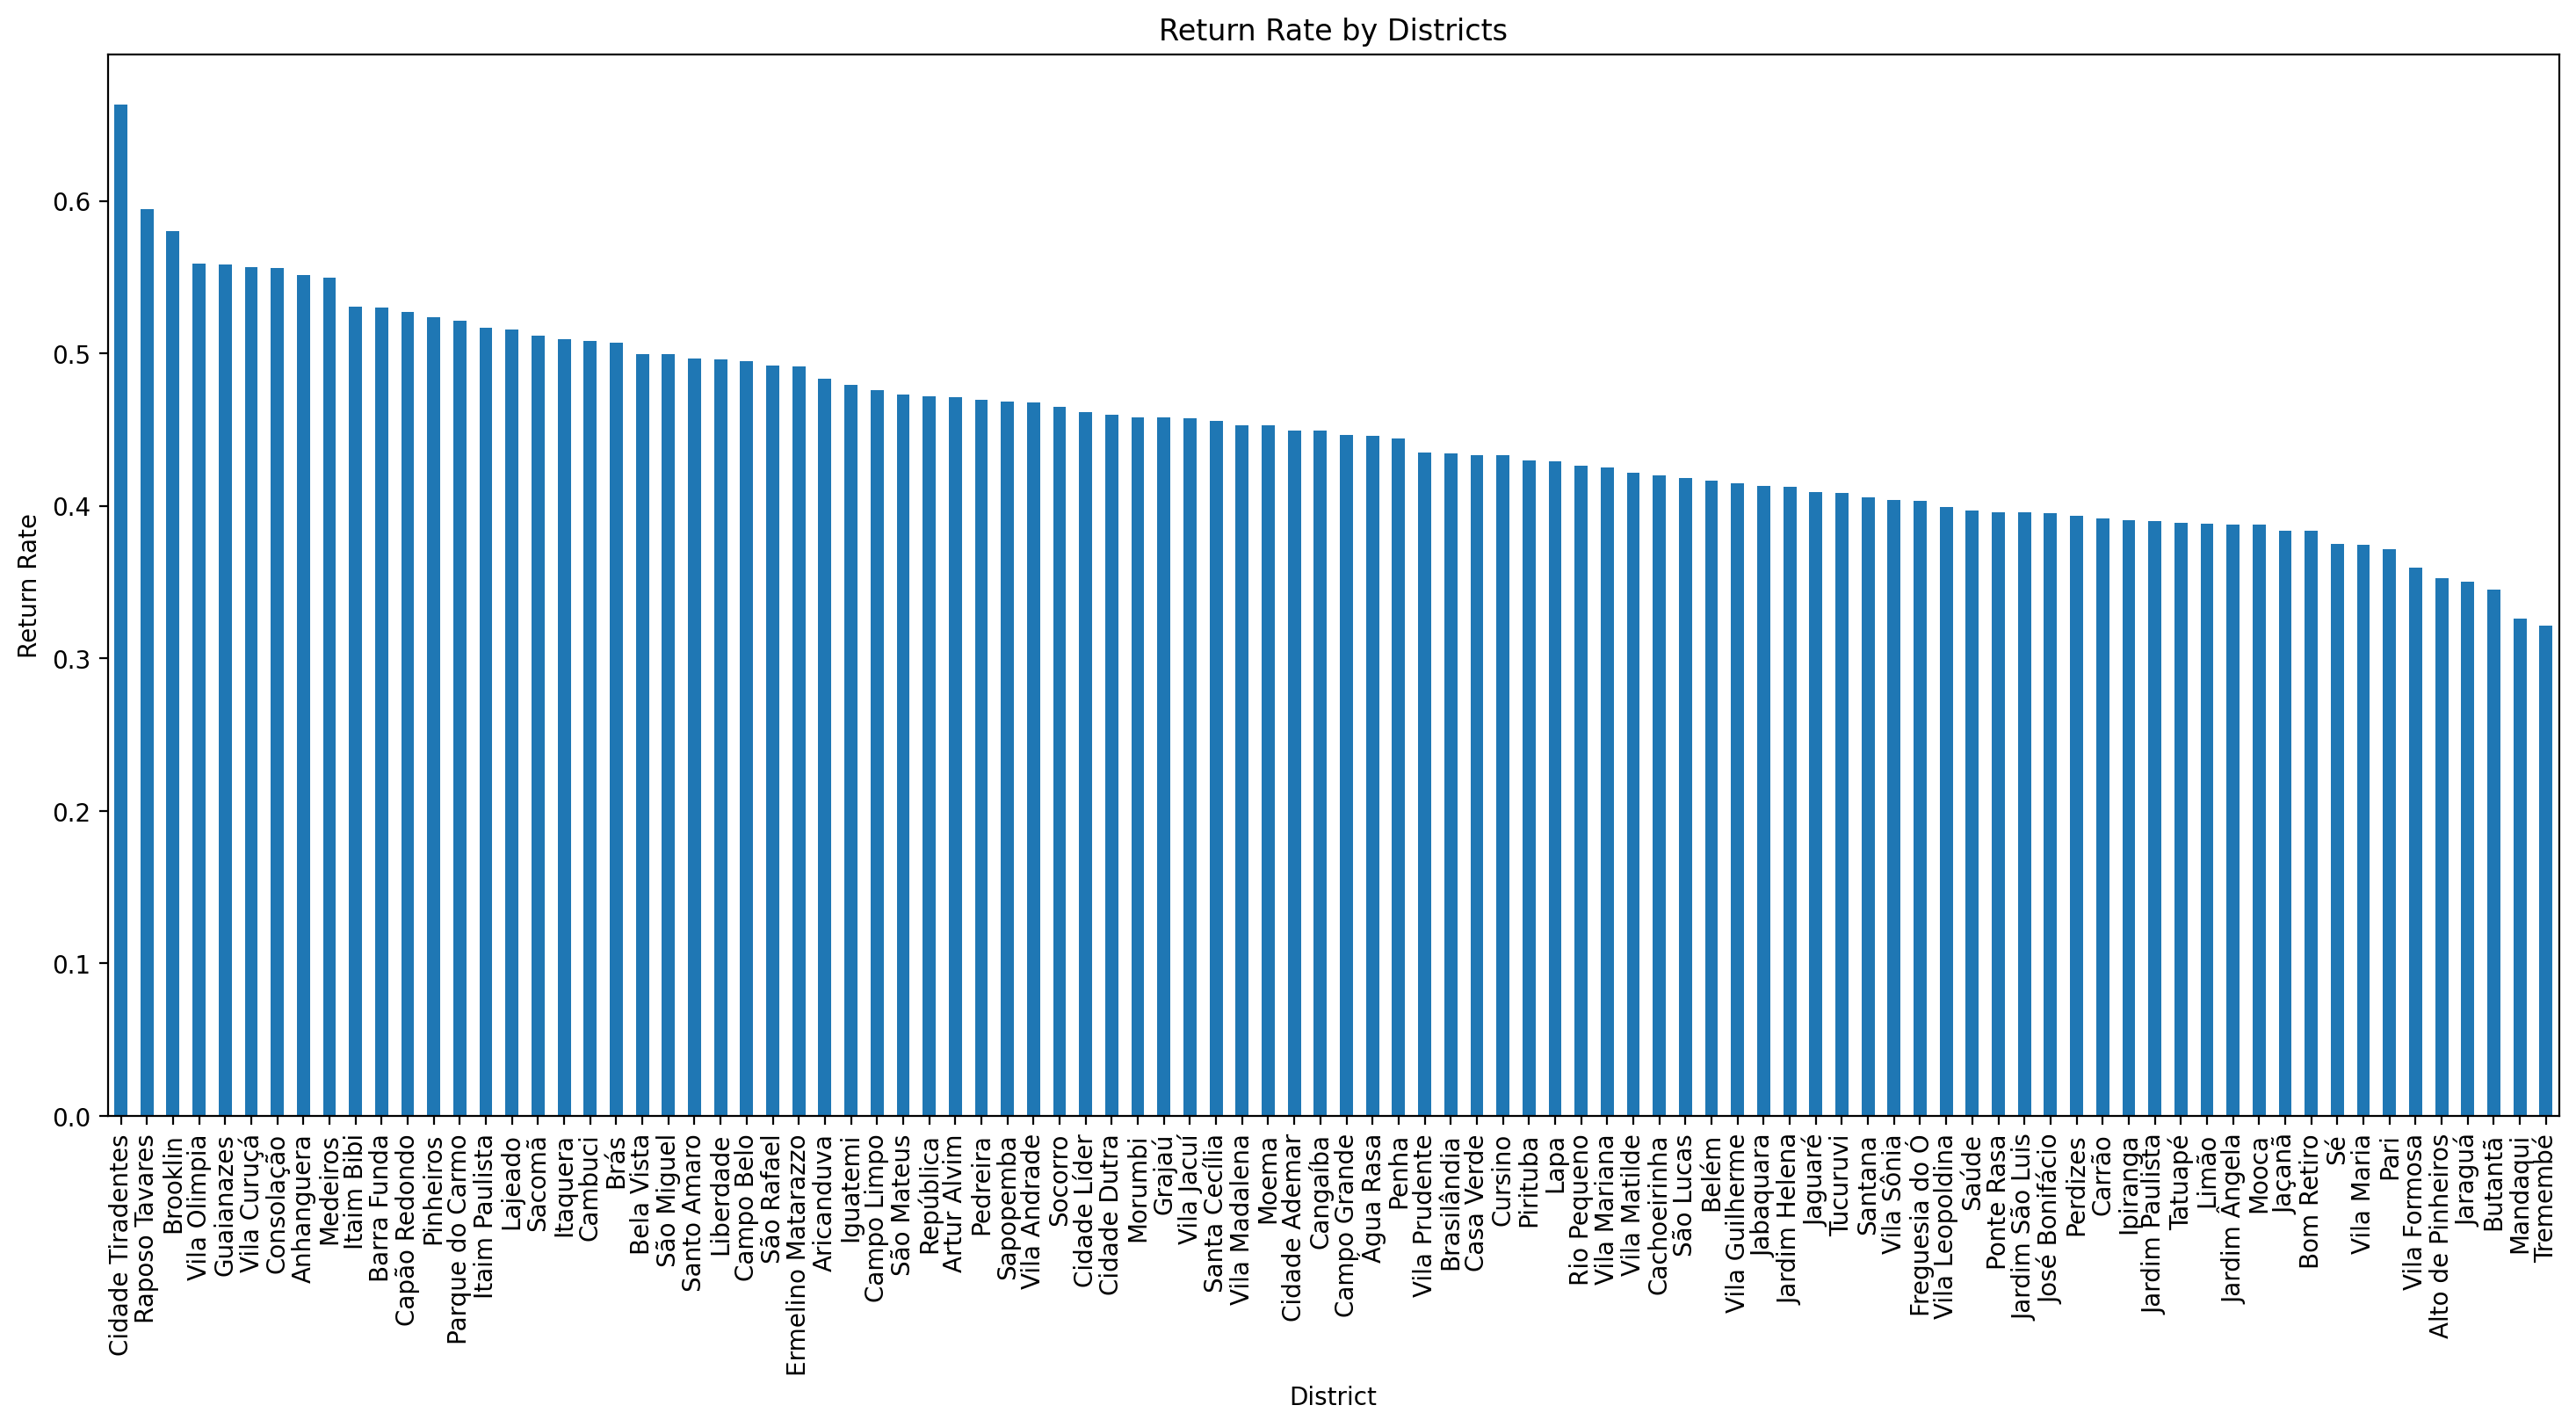

In [50]:
plt.figure(figsize=(18,8),dpi=200)
plt.title("Return Rate by Districts")
plt.ylabel("Return Rate")
rrd.sort_values(ascending=False).dropna().plot.bar();

# Defining the return rate based on rooms

In [51]:
rrr = (dfr.groupby('Rooms')['Price m2'].mean() / dfs.groupby('Rooms')['Price m2'].mean())*100

In [52]:
rrr.sort_values(ascending=False).dropna()

Rooms
1    0.588595
2    0.493422
5    0.413524
3    0.413274
4    0.349056
6    0.127036
Name: Price m2, dtype: float64

One bedroom has the best return rate

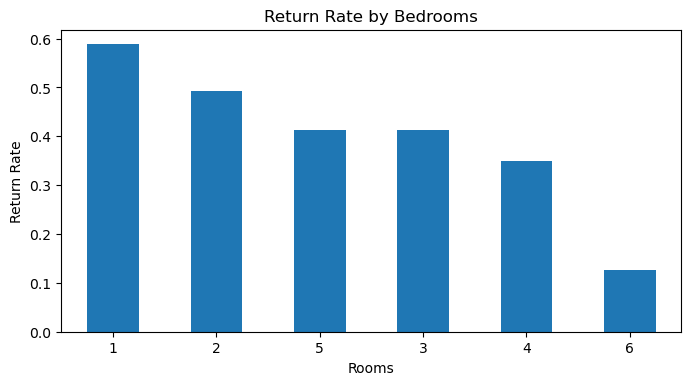

In [53]:
plt.figure(figsize=(8,4),dpi=100)
rrr.sort_values(ascending=False).dropna().plot.bar()
plt.title("Return Rate by Bedrooms")
plt.ylabel("Return Rate")
plt.xticks(rotation = 0);

# Defining the return rate base on districts and rooms

In [54]:
rrdr = (dfr.groupby(['District','Rooms'])['Price m2'].mean() / dfs.groupby(['District','Rooms'])['Price m2'].mean())*100

In [55]:
rrdr.sort_values(ascending=False).nlargest(50)

District            Rooms
Vila Madalena       1        0.829219
Aricanduva          1        0.811688
Pinheiros           1        0.768403
Guaianazes          3        0.710798
Raposo Tavares      2        0.659493
São Miguel          1        0.657982
Cidade Tiradentes   2        0.649264
Barra Funda         1        0.648411
São Miguel          3        0.631317
Brooklin            1        0.630553
Iguatemi            2        0.616082
Medeiros            2        0.608219
Consolação          1        0.600848
Anhanguera          4        0.600820
Raposo Tavares      3        0.592347
Vila Olimpia        3        0.590283
Morumbi             1        0.579372
Vila Olimpia        1        0.578294
Vila Matilde        1        0.577733
Consolação          2        0.575952
Brás                1        0.572547
Brooklin            2        0.571136
Capão Redondo       2        0.566287
Anhanguera          2        0.565650
Casa Verde          1        0.560674
Bela Vista          1   

In [56]:
rrdr.sort_values(ascending=False).nsmallest(50)

District           Rooms
Santana            5        0.230861
Mandaqui           4        0.232690
Tremembé           4        0.235222
Mooca              4        0.241675
Belém              4        0.251268
Jardim Paulista    4        0.265651
Tremembé           1        0.267285
Sé                 2        0.270460
Carrão             4        0.273877
Santana            3        0.275096
Saúde              4        0.277618
Jaguaré            4        0.282254
Vila Madalena      3        0.284007
Ponte Rasa         3        0.285922
Vila Formosa       3        0.295114
Alto de Pinheiros  4        0.296445
Santana            4        0.302086
Cursino            1        0.309066
Butantã            4        0.312380
Bom Retiro         4        0.313165
Casa Verde         4        0.313607
Rio Pequeno        4        0.315645
Vila Guilherme     1        0.317840
Capão Redondo      1        0.318262
Tremembé           3        0.318961
                   2        0.325756
Santa Cecília

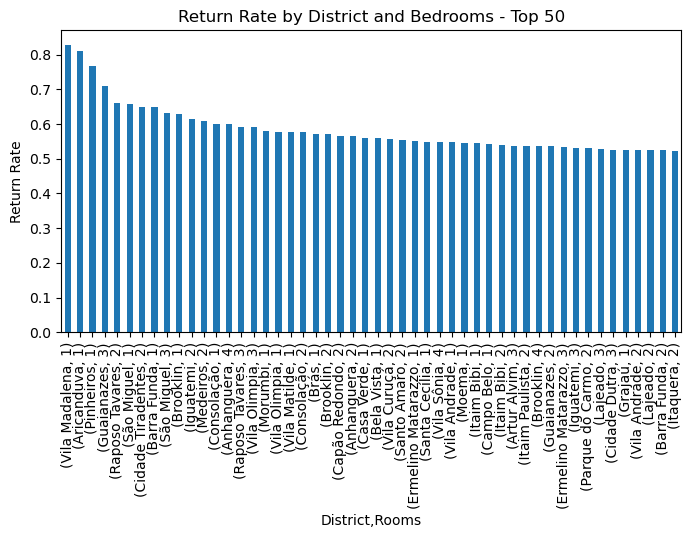

In [57]:
plt.figure(figsize=(8,4),dpi=100)
rrdr.sort_values(ascending=False).dropna()[:50].plot.bar()
plt.title("Return Rate by District and Bedrooms - Top 50")
plt.ylabel("Return Rate")
plt.xticks(rotation = 90);

In general small apartments has better return rates than the big ones. Apartments far from the center of the city has the best return rate, because the price for rent by squared meter is not so different from the best places in the city, but the price for sale is very small. One bedroom in Vila Madelena District has the best return rate in the city.